# Trying background subtraction # 

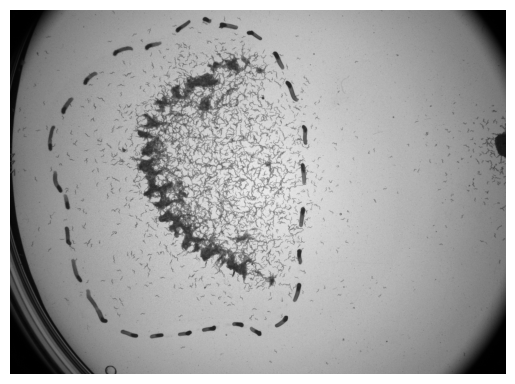

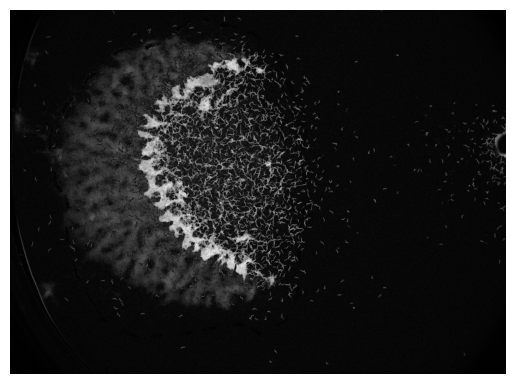

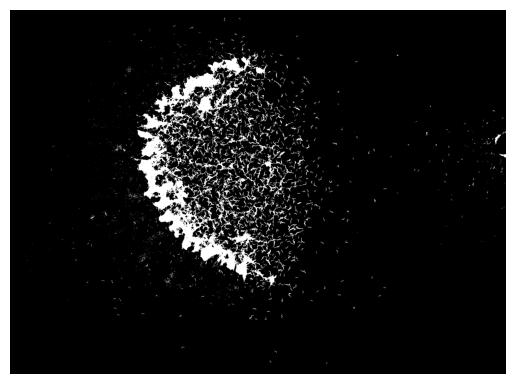

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Specify the directory where the frames are stored
frame_dir = '/Volumes/TOSHIBA_EXT/swarming_surabhi/Experiment-589/Experiment-589'
frame_files = [os.path.join(frame_dir, f) for f in os.listdir(frame_dir) if f.endswith('.tif') and not f.startswith('._')]

# Check if frame_files is not empty
if not frame_files:
    raise ValueError("No frame files found in the specified directory.")

# Sample n images across the video
n = min(50, len(frame_files))  # Use 50 or the number of available frames, whichever is smaller
sampled_frames = np.linspace(0, len(frame_files) - 1, n, dtype=int)


# Load the sampled frames
background_frames = []
for i in sampled_frames:
    img = cv2.imread(frame_files[i], cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise IOError(f"Could not load image {frame_files[i]}")
    background_frames.append(img)

# Check that all images have the same shape
if not all(img.shape == background_frames[0].shape for img in background_frames):
    raise ValueError("Not all images have the same shape.")

# Compute the average of the sampled frames
background_avg = np.mean(background_frames, axis=0).astype(np.uint8)

# Subtract the background from one of the frames for visualization
frame_to_subtract = cv2.imread(frame_files[0], cv2.IMREAD_GRAYSCALE)
background_subtracted = cv2.absdiff(frame_to_subtract, background_avg)

# Plot the frame with the lightest pixels
plt.imshow(background_frames[0], cmap='gray')
# plt.title('Lightest Pixels After Background Subtraction')
plt.axis('off')
plt.show()

# Plot the frame with the background subtracted
plt.imshow(background_subtracted, cmap='gray')
# plt.title('Frame with Background Subtracted')
plt.axis('off')
plt.show()

# Keep only the lightest valued pixels
# You can adjust the threshold value as needed
_, lightest_pixels = cv2.threshold(background_subtracted, 26, 255, cv2.THRESH_BINARY)

# Plot the frame with the lightest pixels
plt.imshow(lightest_pixels, cmap='gray')
# plt.title('Lightest Pixels After Background Subtraction')
plt.axis('off')
plt.show()


## Apply to all frames and reconstruct video ## 

In [7]:
import cv2
import numpy as np
import os

# Create a directory for preprocessed frames if it does not exist
preprocessed_dir = '/Volumes/TOSHIBA_EXT/swarming_surabhi/Experiment-589/preprocessed_frames'
os.makedirs(preprocessed_dir, exist_ok=True)

# Process each frame
for frame_file in frame_files:
    frame = cv2.imread(frame_file, cv2.IMREAD_GRAYSCALE)
    if frame is None:
        raise IOError(f"Could not load image {frame_file}")

    # Subtract the background
    background_subtracted = cv2.absdiff(frame, background_avg)
    
    # Apply threshold
    _, thresholded_frame = cv2.threshold(background_subtracted, 32, 255, cv2.THRESH_BINARY)
    
    # Construct the path for the preprocessed frame
    preprocessed_frame_path = os.path.join(preprocessed_dir, os.path.basename(frame_file))
    
    # Save the thresholded frame
    cv2.imwrite(preprocessed_frame_path, thresholded_frame)

# Inform the user of completion
print(f"All frames have been processed and saved to {preprocessed_dir}.")

KeyboardInterrupt: 

In [8]:
# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v') # You can change 'mp4v' with 'XVID' if you want to use .avi format
output_video_path = os.path.join(preprocessed_dir, 'processed_video.mp4') # Change extension to .avi if needed
frame_shape = (background_frames[0].shape[1], background_frames[0].shape[0])
out = cv2.VideoWriter(output_video_path, fourcc, 20.0, frame_shape, isColor=False)

# Retrieve and sort the processed frames
processed_frames = [os.path.join(preprocessed_dir, f) for f in os.listdir(preprocessed_dir) if f.endswith('.tif')]
processed_frames.sort(key=lambda x: int(x.split('_t')[-1].split('.tif')[0]))

# Write frames to the video
for frame_path in processed_frames:
    frame = cv2.imread(frame_path, cv2.IMREAD_GRAYSCALE)
    out.write(frame)

# Release everything when job is finished
out.release()

# Inform the user of completion
print(f"The video has been created at {output_video_path}.")

The video has been created at /Volumes/TOSHIBA_EXT/swarming_surabhi/Experiment-589/preprocessed_frames/processed_video.mp4.
